In [2]:
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
def compare_results(lstm_df, ann_df):
    # You might want to merge or concatenate dfs for comparison, or compare them side-by-side
    # For simplicity, let's just print out the head of each DataFrame here
    print("LSTM Model Results:")
    print(lstm_df.head())
    print("\nANN Model Results:")
    print(ann_df.head())

In [4]:
def analyze_performance(ann_results, lstm_results):
    """
    Analyze and compare the performance of ANN and LSTM models.
    
    Parameters:
    - ann_results: DataFrame containing ANN model results.
    - lstm_results: DataFrame containing LSTM model results.
    
    Returns:
    - DataFrame with comparison results including differences in metrics.
    """
    comparison_df = pd.merge(ann_results, lstm_results, on="Feature Set", suffixes=('_ANN', '_LSTM'))
    for metric in ['Accuracy', 'Precision', 'Recall', 'F1']:
        comparison_df[f'{metric}_Diff'] = comparison_df[f'{metric}_LSTM'] - comparison_df[f'{metric}_ANN']
    return comparison_df.sort_values(by='Accuracy_Diff', ascending=False)

def visualize_performance(comparison_df):
    """
    Visualize the performance comparison between ANN and LSTM models.
    
    Parameters:
    - comparison_df: DataFrame with the comparison results.
    """
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    axes = axes.flatten()

    for i, metric in enumerate(metrics):
        sns.barplot(x=f'{metric}_Diff', y='Feature Set', data=comparison_df, ax=axes[i])
        axes[i].set_title(f'Difference in {metric} between LSTM and ANN')
        axes[i].set_xlabel(f'{metric} Difference')
        axes[i].set_ylabel('Feature Set')
    
    plt.tight_layout()
    plt.show()

In [5]:
def feature_set_impact_analysis(results_df):
    # Group by feature set and calculate mean performance metrics
    grouped_df = results_df.groupby('Feature Set').mean().reset_index()

    # Sort by accuracy or another metric of interest
    sorted_df = grouped_df.sort_values(by='Accuracy', ascending=False)

    print("Feature Set Impact on Model Performance:")
    print(sorted_df[['Feature Set', 'Accuracy', 'Precision', 'Recall', 'F1']])


In [6]:
def plot_comparisons(lstm_df, ann_df):
    plt.figure(figsize=(10, 6))
    
    # Assuming 'Feature Set' is a column in your DataFrame
    # and 'Accuracy' is the metric you want to compare
    plt.plot(lstm_df['Feature Set'], lstm_df['Accuracy'], label='LSTM', marker='o')
    plt.plot(ann_df['Feature Set'], ann_df['Accuracy'], label='ANN', marker='x')
    
    plt.xlabel('Feature Set')
    plt.ylabel('Accuracy')
    plt.title('Model Comparison by Accuracy')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [7]:
def plot_metric_comparisons(lstm_df, ann_df, metric='Accuracy'):
    plt.figure(figsize=(12, 8))
    
    # Plotting
    plt.plot(lstm_df['Feature Set'], lstm_df[metric], label='LSTM', marker='o')
    plt.plot(ann_df['Feature Set'], ann_df[metric], label='ANN', marker='x')

    # Customization
    plt.xlabel('Feature Set', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.title(f'Model Comparison by {metric}', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.tight_layout()

    plt.show()


In [12]:
feature_names = [
    "Energy Dynamics",
    "Temporal Dynamics Focused",
    "Dynamic Range",
    "Voiced vs. Unvoiced",
    "Temporal Energy and Pitch Variation",
    "Energy and Pitch Focused",
    "Pitch and Energy Comprehensive",
    "Timing and Rate",
    "Comprehensive Model with Focus on Dynamics",
    "Comprehensive Model"
]

# Original feature combinations from the DataFrames (as understood from your setup)
feature_combinations = [
    ["mean_energy", "std_energy"],
    ["mean_pitch", "std_pitch", "mean_energy", "std_energy"],
    ["std_pitch", "mean_pitch", "std_energy", "pitch_variation"],
    ["voiced_duration", "unvoiced_duration", "silence_duration"],
    ["mean_pitch", "mean_energy", "pitch_variation", "speech_rate"],
    ["mean_energy", "std_energy", "mean_pitch", "std_pitch", "pitch_variation"],
    ["mean_pitch", "std_pitch", "mean_energy", "std_energy", "pitch_variation"],
    ["duration", "speech_rate", "silence_duration", "voiced_duration", "unvoiced_duration"],
    ["mean_pitch", "std_pitch", "mean_energy", "std_energy", "pitch_variation", "speech_rate"],
    ["mean_pitch", "std_pitch", "mean_energy", "std_energy", "duration", "speech_rate", "silence_duration", "voiced_duration", "unvoiced_duration", "pitch_variation"]
]

feature_set_mapping = {}
for features, name in zip(feature_combinations, feature_names):
    concatenated_features = "+".join(features)  # Concatenate feature names with a '+' symbol as in your CSV files
    feature_set_mapping[concatenated_features] = name  # Map concatenated names to concise names


LSTM Model Results:
  Feature Set  Accuracy  Precision    Recall        F1
0        mfcc  0.960714   0.961263  0.960714  0.960772
1        lpcc  0.842857   0.846123  0.842857  0.843518
2        lfpc  0.939286   0.941808  0.939286  0.938939
3        gfcc  0.953571   0.955112  0.953571  0.953828
4    formants  0.907143   0.907746  0.907143  0.907083

ANN Model Results:
  Feature Set  Accuracy  Precision    Recall        F1
0        mfcc  0.964286   0.965102  0.964286  0.964329
1        lpcc  0.828571   0.837485  0.828571  0.827314
2        lfpc  0.923214   0.925411  0.923214  0.923069
3        gfcc  0.960714   0.961932  0.960714  0.960774
4    formants  0.900000   0.901346  0.900000  0.899660


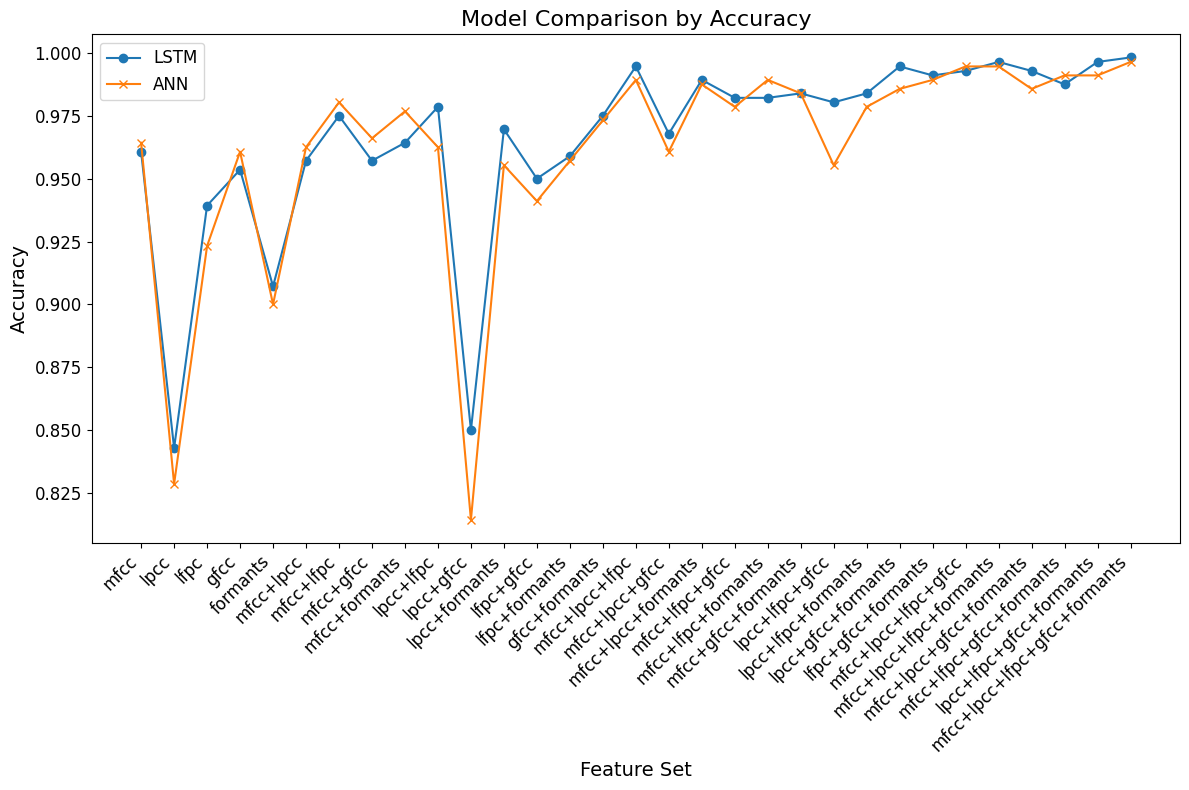

In [8]:
# Load acoustic results
lstm_acoustic_results = pd.read_csv('lstm_acoustic_model_results.csv')
ann_acoustic_results = pd.read_csv('ann_acoustic_model_results.csv')
compare_results(lstm_acoustic_results, ann_acoustic_results)
plot_metric_comparisons(lstm_acoustic_results, ann_acoustic_results)

LSTM Model Results:
                           Feature Set  Accuracy  Precision    Recall  \
0                      Energy Dynamics  0.567857   0.559309  0.567857   
1            Temporal Dynamics Focused  0.542857   0.545225  0.542857   
2                        Dynamic Range  0.560714   0.571949  0.560714   
3                  Voiced vs. Unvoiced  0.669643   0.694126  0.669643   
4  Temporal Energy and Pitch Variation  0.535714   0.548124  0.535714   

         F1  
0  0.556482  
1  0.543150  
2  0.563106  
3  0.665880  
4  0.539776  

ANN Model Results:
                           Feature Set  Accuracy  Precision    Recall  \
0                      Energy Dynamics  0.548214   0.558731  0.548214   
1            Temporal Dynamics Focused  0.566071   0.591498  0.566071   
2                        Dynamic Range  0.548214   0.565492  0.548214   
3                  Voiced vs. Unvoiced  0.664286   0.679333  0.664286   
4  Temporal Energy and Pitch Variation  0.519643   0.528497  0.519643   

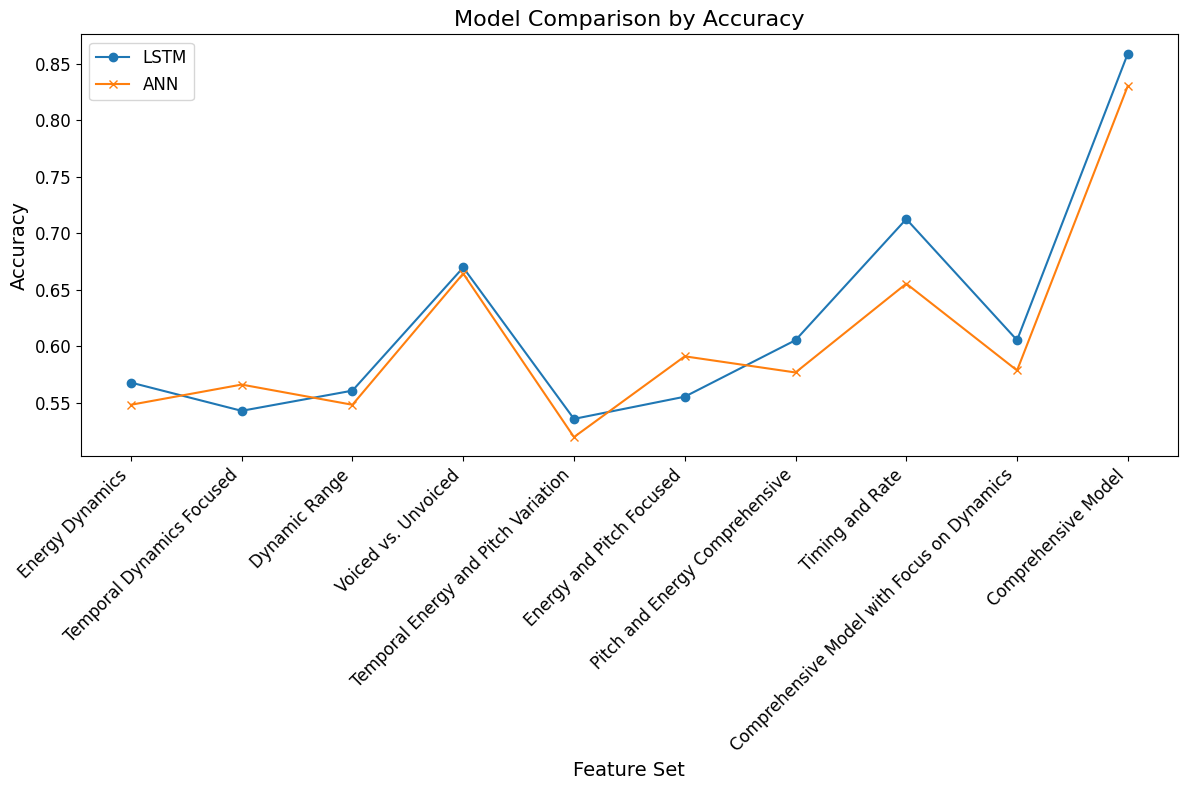

In [13]:
# Load acoustic results
lstm_prosodic_results = pd.read_csv('lstm_prosodic_model_results.csv')
ann_prosodic_results = pd.read_csv('ann_prosodic_model_results.csv')

ann_prosodic_results['Feature Set'] = ann_prosodic_results['Feature Set'].map(feature_set_mapping)
lstm_prosodic_results['Feature Set'] = lstm_prosodic_results['Feature Set'].map(feature_set_mapping)

compare_results(lstm_prosodic_results, ann_prosodic_results)
plot_metric_comparisons(lstm_prosodic_results, ann_prosodic_results, 'Accuracy')

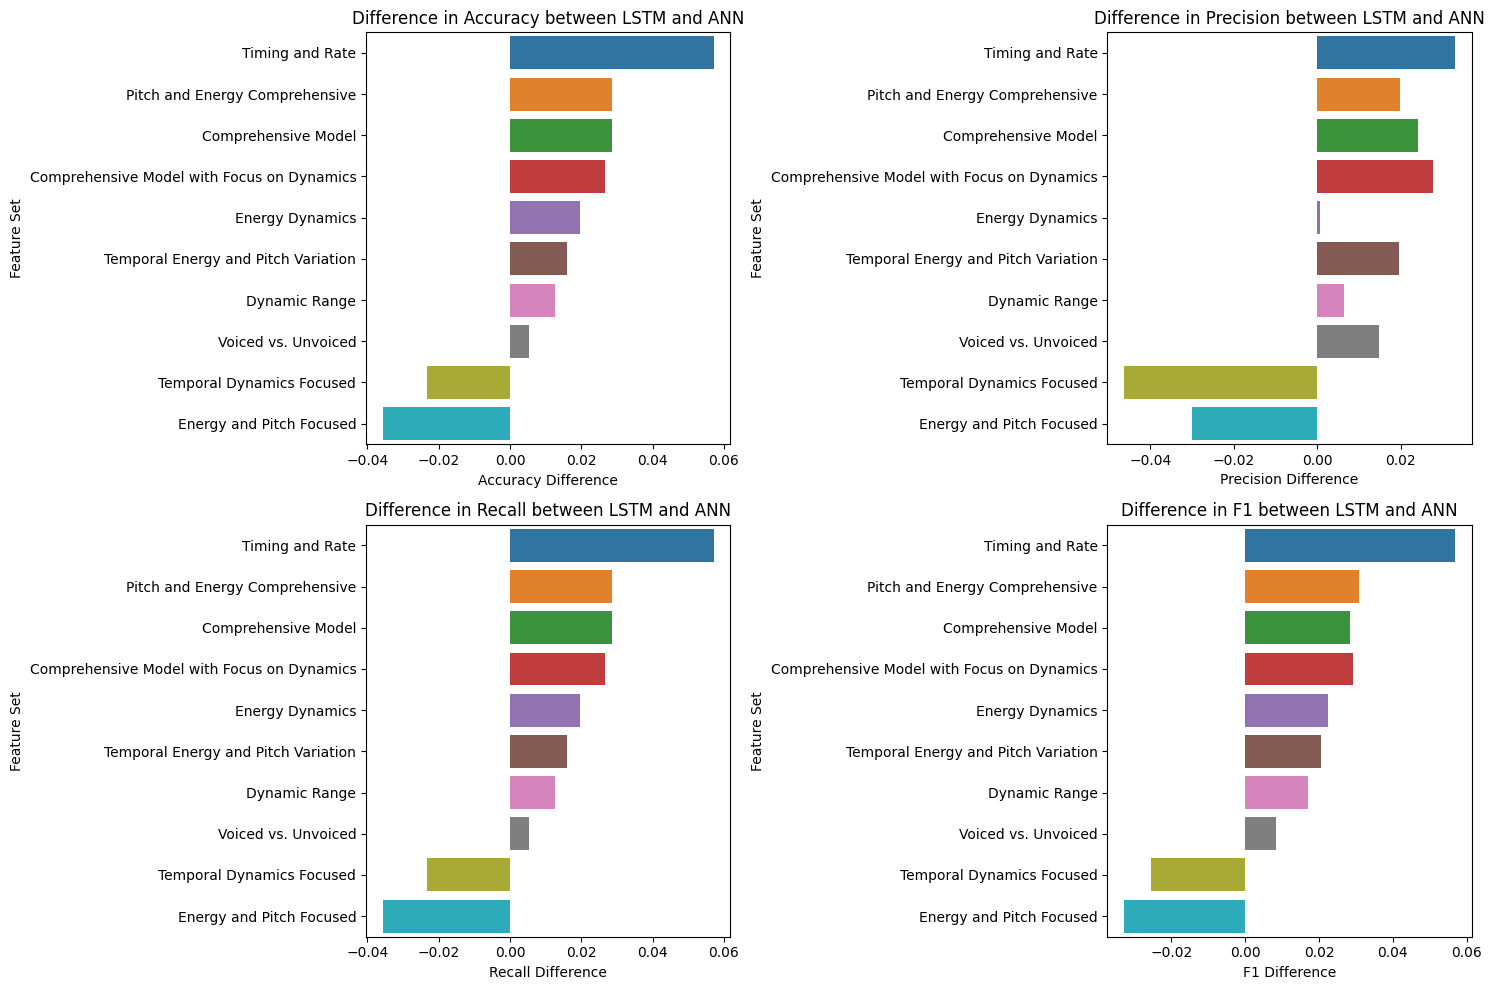

In [14]:
lstm_prosodic_results = pd.read_csv('lstm_prosodic_model_results.csv')
ann_prosodic_results = pd.read_csv('ann_prosodic_model_results.csv')

ann_prosodic_results['Feature Set'] = ann_prosodic_results['Feature Set'].map(feature_set_mapping)
lstm_prosodic_results['Feature Set'] = lstm_prosodic_results['Feature Set'].map(feature_set_mapping)

# Analyze the performance
comparison_df = analyze_performance(ann_prosodic_results, lstm_prosodic_results)

# Visualize the performance comparison
visualize_performance(comparison_df)

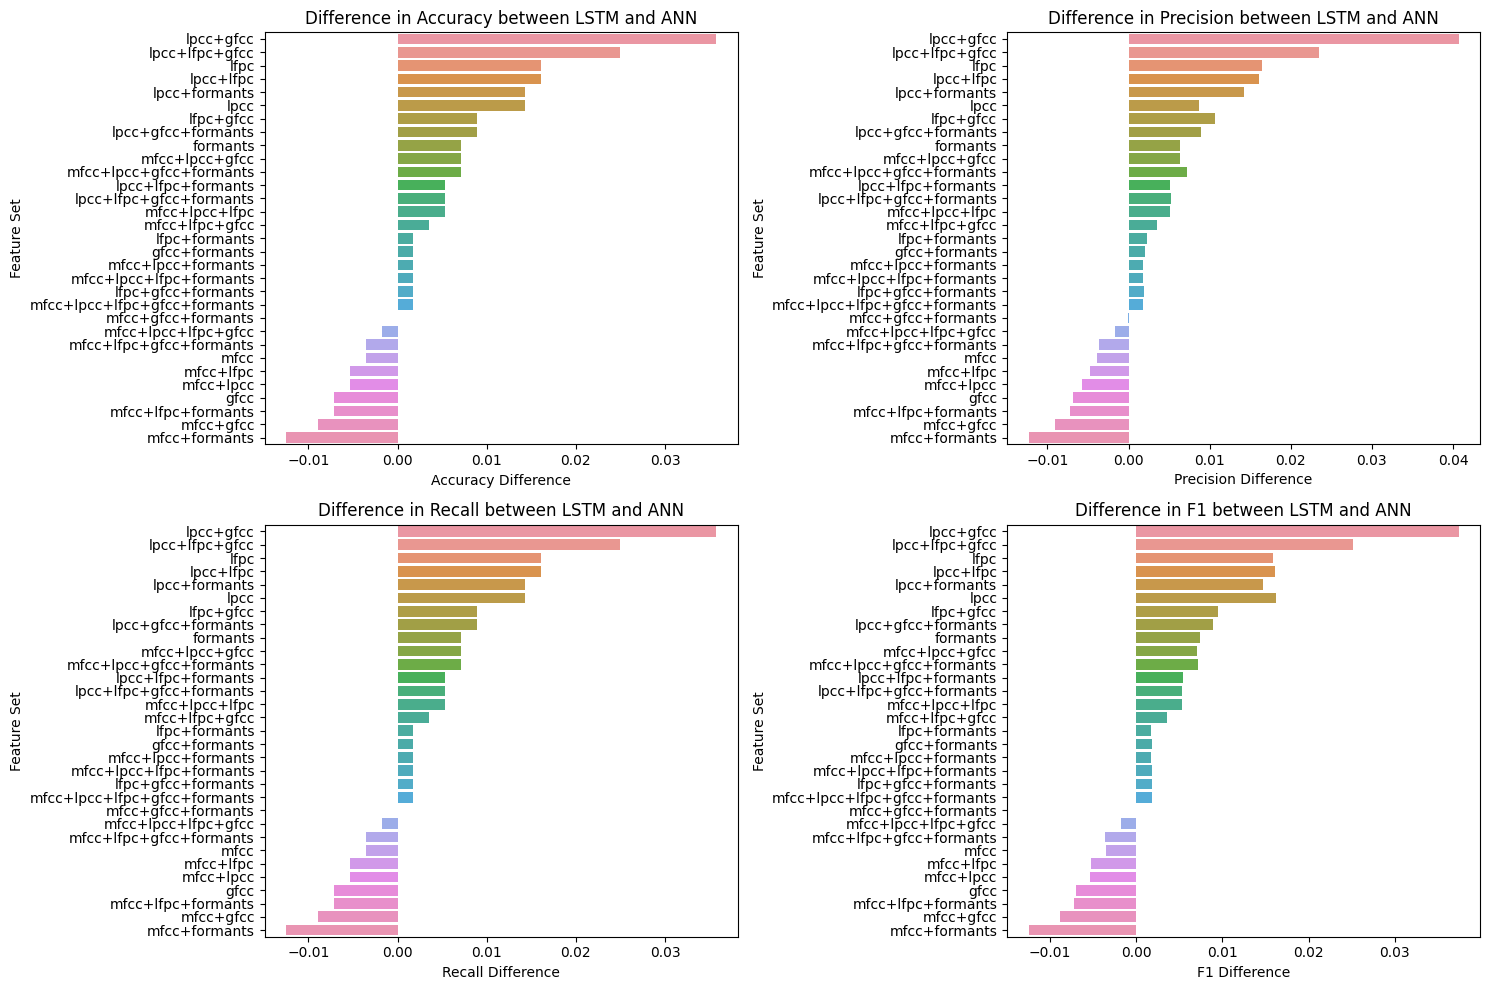

In [11]:
# Load acoustic results
lstm_acoustic_results = pd.read_csv('lstm_acoustic_model_results.csv')
ann_acoustic_results = pd.read_csv('ann_acoustic_model_results.csv')

comparison_df = analyze_performance(ann_acoustic_results, lstm_acoustic_results)
visualize_performance(comparison_df)